<a href="https://colab.research.google.com/github/govindakolli/Pytorch/blob/main/02_pytorch_NN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#02. Neural Network Classificaton using PyTorch

Classification is problem of predicting whether something is one thing or another(there can be multiple things as the options).

Resource Notebook is [here](https://www.learnpytorch.io/02_pytorch_classification/)





##1. Make classification data and get it ready

In [6]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise =0.03,
                    random_state = 42
                    )

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
print(f"First five samples of X : \n{X[:5]}\n")
print(f"First five samples of y : \n{y[:5]}")


First five samples of X : 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First five samples of y : 
[1 1 1 1 0]


In [9]:
import numpy as np

# Make DataFrame of cirlce data
import pandas as pd

circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:,1],
                        "label" : y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [10]:
circles.label.value_counts()

,count
label,
1,500
0,500


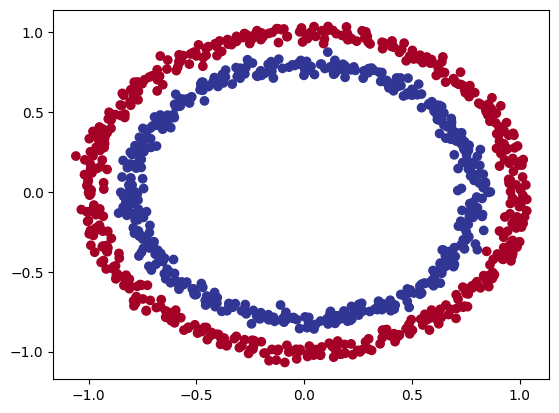

In [11]:
# Let's visualoze
import matplotlib.pyplot as plt

plt.scatter(x= X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu )

### 1.1 Check input and output shapes

In [12]:
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [14]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X : {X_sample} and the same for y : {y_sample}")
print(f"Shape for one sample of X : {X_sample.shape} and the same for y : {y_sample.shape}")

Values for one sample of X : [0.75424625 0.23148074] and the same for y : 1
Shape for one sample of X : (2,) and the same for y : ()


### 1.2 Turn data into tensor and create train/test splits

In [15]:
import torch
torch.__version__

'2.6.0+cu124'

In [16]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [17]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [18]:
type(X),X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [19]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

##2. Building a model

Let's build a model to classify our red and blue dots.

To do so, we want to:
1. Setup devcie agnostic code so our model run on an accelerator(GPU) if there is one
2. Construct a model(by sub classing `nn.Module`
3. Define a loss function and optimizer
4. Create a training and testing loop

In [21]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [22]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Let's create model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclasses `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to target `device`

In [23]:
X_train.shape

torch.Size([800, 2])

In [24]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear() layers that are capable of handling the shapes our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from the previous layer and outputs a single feature (same shape as  y)
  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer1 -> layer2 -> output

#4. Instantiate an instance of our model class and send it to target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
next(model_0.parameters()).device

device(type='cpu')

In [26]:
# Let's replicqate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
model_0.state_dict()


OrderedDict([('0.weight',
              tensor([[ 0.4530,  0.5240],
                      [ 0.0962, -0.1580],
                      [ 0.0466, -0.3594],
                      [ 0.2020, -0.4626],
                      [ 0.5642,  0.2717]])),
             ('0.bias', tensor([-0.4099,  0.2778, -0.3402,  0.5239, -0.5099])),
             ('1.weight',
              tensor([[-0.2940,  0.0442, -0.4043,  0.0179,  0.4053]])),
             ('1.bias', tensor([-0.0951]))])

In [28]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)}, shape : {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)}, Shape : {X_test.shape}")
print(f"\nFirst 10 predictions : \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 Labels : \n{y_test[:10]}")

Length of predictions : 200, shape : torch.Size([200, 1])
Length of test samples : 200, Shape : torch.Size([200, 2])

First 10 predictions : 
tensor([[0.],
        [0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [0.]])

First 10 Labels : 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup Loss function and optimizer

Which loss function or optimizer should we use?

Again...  this is a problem specific.

For example, for reggression you might want MAE or MSE

For classification you might want binary cross entropy or categorical cross entropy(cross entropy)

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For common choices of loss functions and optimizers - [Click here](https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer)

* For the loss function we are going to use `torch.nn.BCEWithLogitsLoss()`, for more on what binary cross entropy(BCE)is, see this [article] (https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a/)

* For definition on what a logit is see this [Stack Ovrflow] (https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow/52111173#52111173)

* For different optimizers see `torch.optim`



In [29]:
# Setup loss function
#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer  = torch.optim.SGD(params = model_0.parameters(),
                             lr = 0.1)

In [30]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## 3. Train Model

To train our model, we need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss Backward (backpropagation)
5. Optimizer step (Gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking `argmax()` .

In [31]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits


tensor([[ 0.0051],
        [ 0.0620],
        [-0.1086],
        [ 0.0371],
        [-0.0521]])

In [32]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [33]:
# Use sigmoid activation on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5013],
        [0.5155],
        [0.4729],
        [0.5093],
        [0.4870]])

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5, `y=1` (class 1)

* `y_pred_probs` < 0.5, `y=0` (class 0)


In [34]:
# Find the prediction lables
y_preds = torch.round(y_pred_probs)

# In full
# logits -> pred probs -> pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Chech for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 0., 1., 0.])

### 3.2 Building a training and testing loop

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42) # If device = cuda

# Set the no of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training mode
  model_0.train()

  # 1.Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> prob labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as inputs
                 y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. optimizer step ( Gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true= y_test, y_pred = test_pred)

  # Print what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss: .5f}, Acc :{acc:.2f}%  | Test loss :{test_loss: .5f}, Test Acc : {test_acc: .2f}% ")



Epoch : 0 | Loss :  0.69330, Acc :49.62%  | Test loss : 0.69662, Test Acc :  47.00% 
Epoch : 10 | Loss :  0.69311, Acc :52.38%  | Test loss : 0.69501, Test Acc :  47.50% 
Epoch : 20 | Loss :  0.69304, Acc :49.38%  | Test loss : 0.69401, Test Acc :  48.00% 
Epoch : 30 | Loss :  0.69318, Acc :49.12%  | Test loss : 0.69352, Test Acc :  49.00% 
Epoch : 40 | Loss :  0.69314, Acc :53.25%  | Test loss : 0.69415, Test Acc :  49.50% 
Epoch : 50 | Loss :  0.69314, Acc :49.50%  | Test loss : 0.69608, Test Acc :  46.50% 
Epoch : 60 | Loss :  0.69320, Acc :52.00%  | Test loss : 0.69614, Test Acc :  46.50% 
Epoch : 70 | Loss :  0.69306, Acc :51.12%  | Test loss : 0.69529, Test Acc :  47.50% 
Epoch : 80 | Loss :  0.69308, Acc :47.00%  | Test loss : 0.69398, Test Acc :  47.50% 
Epoch : 90 | Loss :  0.69324, Acc :50.00%  | Test loss : 0.69320, Test Acc :  50.00% 


## 4. Make Predictions and Evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

Let's Visualize

In [36]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
#
    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


In [37]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch Repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("hepler_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary, plot_predictions

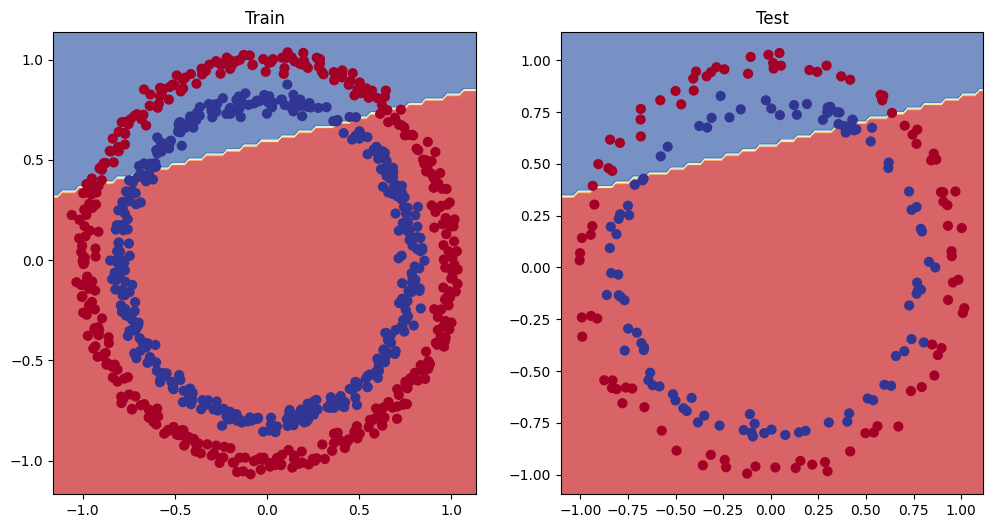

In [38]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:

* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [39]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)     #ctrl + / adds #'s at selected lines
    # z = self.layer_3(z)

    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create a optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [41]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# No of epochs to train for longer
epochs = 1000

# Put data into target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Write training and evaluation loop
for epoch in range(epochs):
  ###Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred=y_pred)

  # 3. Zero grad
  optimizer.zero_grad()

  # 4. Loss Backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ###Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  #Print what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Loss : {loss: .5f}, Acc :{acc:.2f}%  | Test loss :{test_loss: .5f}, Test Acc : {test_acc: .2f}% ")


Epoch : 0 | Loss :  0.69396, Acc :50.88%  | Test loss : 0.69261, Test Acc :  51.00% 
Epoch : 100 | Loss :  0.69305, Acc :50.38%  | Test loss : 0.69379, Test Acc :  48.00% 
Epoch : 200 | Loss :  0.69299, Acc :51.12%  | Test loss : 0.69437, Test Acc :  46.00% 
Epoch : 300 | Loss :  0.69298, Acc :51.62%  | Test loss : 0.69458, Test Acc :  45.00% 
Epoch : 400 | Loss :  0.69298, Acc :51.12%  | Test loss : 0.69465, Test Acc :  46.00% 
Epoch : 500 | Loss :  0.69298, Acc :51.00%  | Test loss : 0.69467, Test Acc :  46.00% 
Epoch : 600 | Loss :  0.69298, Acc :51.00%  | Test loss : 0.69468, Test Acc :  46.00% 
Epoch : 700 | Loss :  0.69298, Acc :51.00%  | Test loss : 0.69468, Test Acc :  46.00% 
Epoch : 800 | Loss :  0.69298, Acc :51.00%  | Test loss : 0.69468, Test Acc :  46.00% 
Epoch : 900 | Loss :  0.69298, Acc :51.00%  | Test loss : 0.69468, Test Acc :  46.00% 


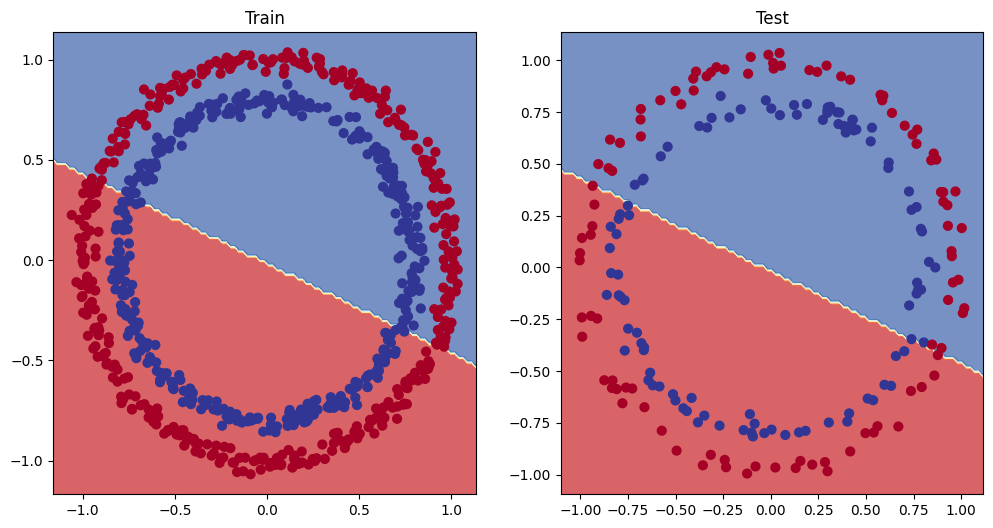

In [42]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [43]:
# Create some data ( same as notebook 01)
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias # Linear Regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [44]:
# Create train test split
train_split = int(0.8 * len(X_regression))

X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

In [45]:
#Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})


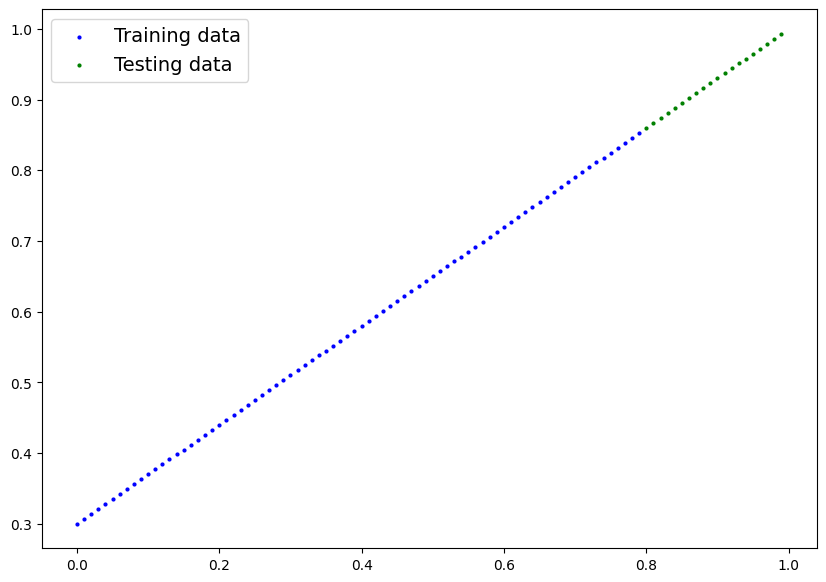

In [46]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

In [47]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 Adjusting `model_1` to fit a straight line

In [48]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
# Loss function and optimizer
loss_fun = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_2.parameters(),  lr = 0.01)


In [50]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# load data into target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Set No of epochs
epochs = 1000

# Training and Testing loops
for epoch in range(epochs):
  ### Training
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fun(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Printing what' happening
  if epoch % 100 == 0:
    print(f"epoch : {epoch}| Loss : {loss:0.5f} | Test loss : {test_loss:0.5f}")

epoch : 0| Loss : 0.75986 | Test loss : 0.68587
epoch : 100| Loss : 0.02858 | Test loss : 0.40019
epoch : 200| Loss : 0.02533 | Test loss : 0.40068
epoch : 300| Loss : 0.02137 | Test loss : 0.40090
epoch : 400| Loss : 0.01964 | Test loss : 0.40098
epoch : 500| Loss : 0.01940 | Test loss : 0.40108
epoch : 600| Loss : 0.01903 | Test loss : 0.40106
epoch : 700| Loss : 0.01878 | Test loss : 0.40107
epoch : 800| Loss : 0.01840 | Test loss : 0.40095
epoch : 900| Loss : 0.01798 | Test loss : 0.40102


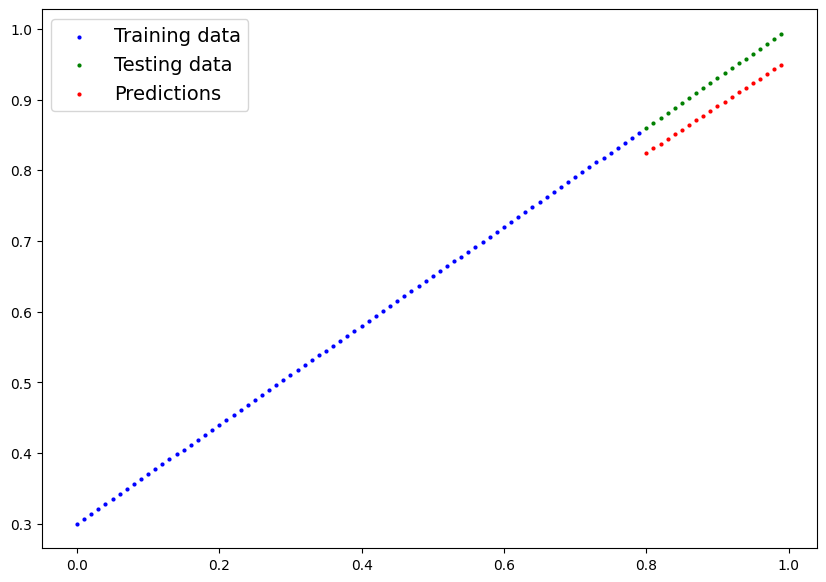

In [51]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels= y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels= y_test_regression.cpu(),
                 predictions= y_preds.cpu())

## 6. The missing piece: non-linearity
"What patterns could you draw if you were given infinite amount of a straight and non-straight lines"

Or in machine learning terms, an infinite(but really finite) of linear and non-linear functions

### 6.1 Recreating non-linear data (red and blue circles)

In [52]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples =1000
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state = 42)

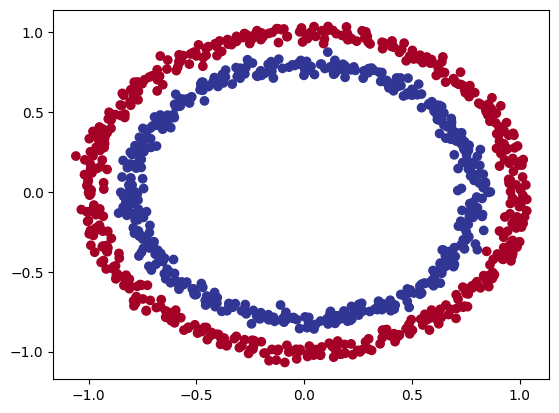

In [53]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [54]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train[:5], y_train[:5], X_test[:5], y_test[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 1., 0., 1.]))

### 6.2 Building a model with non-linearity

In [55]:
 # Build a model with non-linear activation functions
 from torch import nn
 class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [56]:
# Setup loss and Optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.1)

### 6.3 Training a model with non-linearity

In [57]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data into target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Epochs
epochs =1000

# Write training and evaluation loop
for epoch in range(epochs):
  ###Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred=y_pred)

  # 3. Zero grad
  optimizer.zero_grad()

  # 4. Loss Backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ###Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  #Print what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Loss : {loss: .5f}, Acc :{acc:.2f}%  | Test loss :{test_loss: .5f}, Test Acc : {test_acc: .2f}% ")


Epoch : 0 | Loss :  0.69295, Acc :50.00%  | Test loss : 0.69319, Test Acc :  50.00% 
Epoch : 100 | Loss :  0.69115, Acc :52.88%  | Test loss : 0.69102, Test Acc :  52.50% 
Epoch : 200 | Loss :  0.68977, Acc :53.37%  | Test loss : 0.68940, Test Acc :  55.00% 
Epoch : 300 | Loss :  0.68795, Acc :53.00%  | Test loss : 0.68723, Test Acc :  56.00% 
Epoch : 400 | Loss :  0.68517, Acc :52.75%  | Test loss : 0.68411, Test Acc :  56.50% 
Epoch : 500 | Loss :  0.68102, Acc :52.75%  | Test loss : 0.67941, Test Acc :  56.50% 
Epoch : 600 | Loss :  0.67515, Acc :54.50%  | Test loss : 0.67285, Test Acc :  56.00% 
Epoch : 700 | Loss :  0.66659, Acc :58.38%  | Test loss : 0.66322, Test Acc :  59.00% 
Epoch : 800 | Loss :  0.65160, Acc :64.00%  | Test loss : 0.64757, Test Acc :  67.50% 
Epoch : 900 | Loss :  0.62362, Acc :74.00%  | Test loss : 0.62145, Test Acc :  79.00% 


### 6.4 Evaluating a model trained with non-linear activation functions

In [58]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

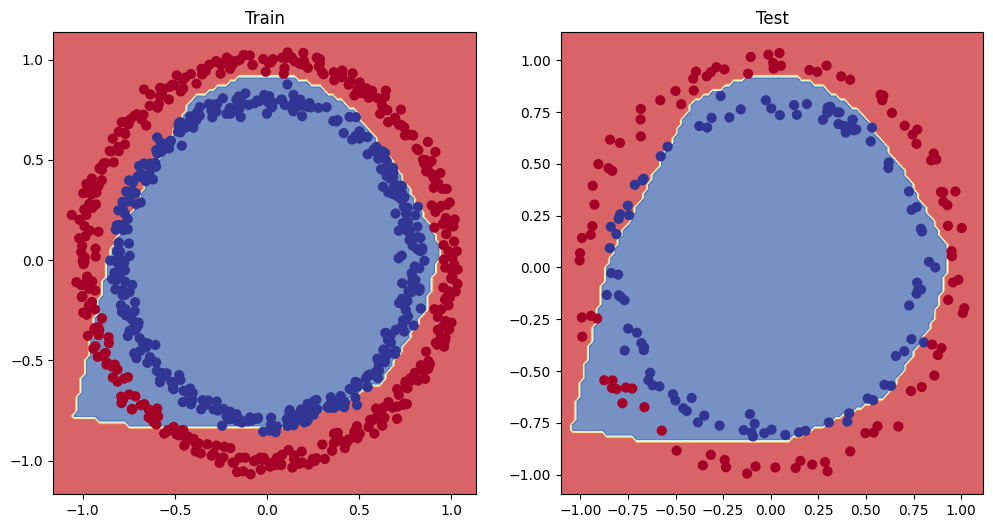

In [59]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions


Neural Networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear and non-linear functions

In [61]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype = torch.float)
A.dtype

torch.float32

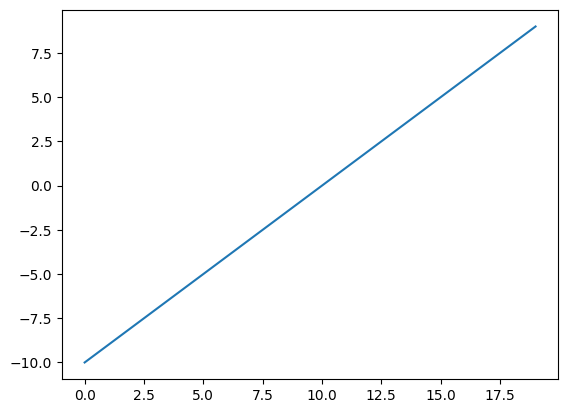

In [62]:
# Visualize the tensor
plt.plot(A)

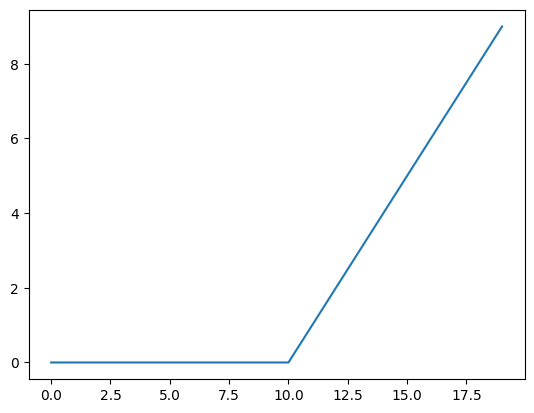

In [64]:
plt.plot(torch.relu(A))

In [65]:
def relu(x : torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

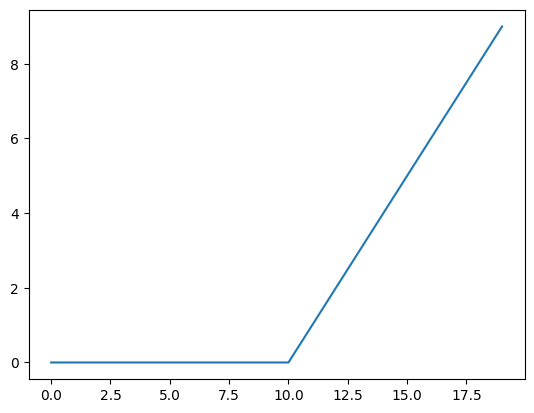

In [66]:
#plot ReLU activation function
plt.plot(relu(A))

In [67]:
# NOw let's do the same for sigmoid
def sigmoid(x : torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

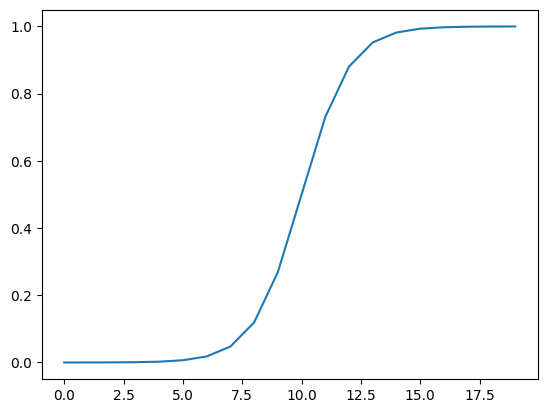

In [69]:
plt.plot(torch.sigmoid(A))

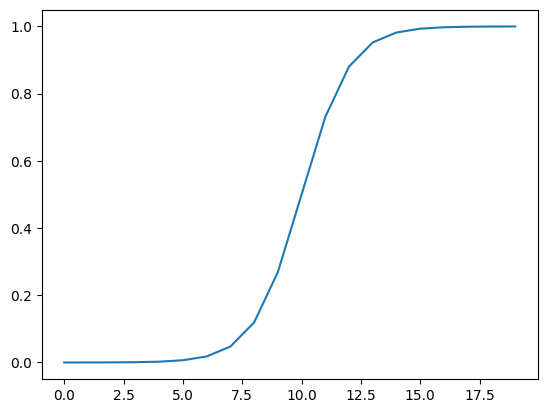

In [70]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification
* Multi-class classification

### 8.1 Creating a toy multi-class dataset

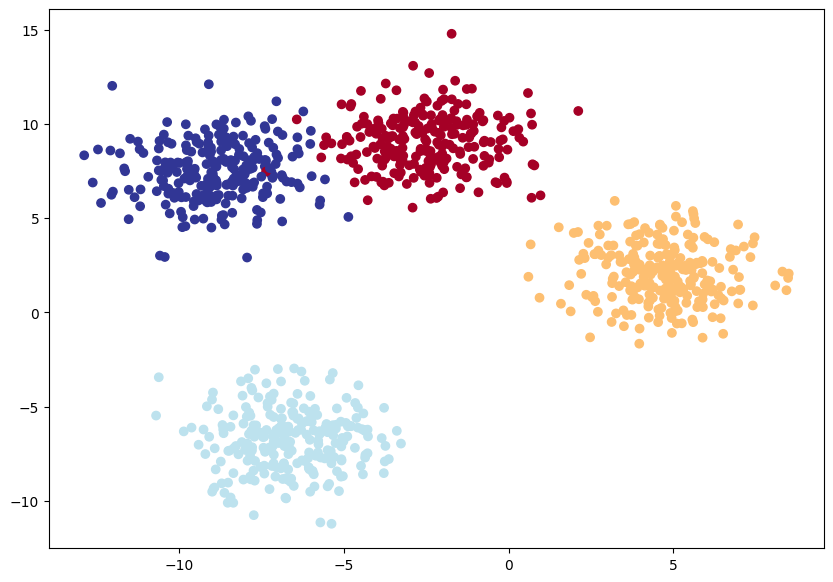

In [72]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
X_blob, y_blob = make_blobs(n_samples =1000,
                           n_features = NUM_FEATURES,
                           centers = NUM_CLASSES,
                           cluster_std = 1.5, # Give the clusters a little shake up
                           random_state = RANDOM_SEED)

# 2. Turn data into tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# 3. Split data into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size= 0.2 , random_state = RANDOM_SEED)

# 4. Plot data (Visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap = plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch

In [91]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [92]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units =8):
    """Initializes multi-class classification model.

    Args:
      input_features (int) : Number of input features to the model
      output_features (int) : Number of output features(Number of output classes) to the model
      hidden_units (int) : Number of hidden units between layers, default 8

    Returns:

    Examples:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)

    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features = 2,
                    output_features = 4,
                    hidden_units = 8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [93]:
torch.unique(y_blob_train)

tensor([0., 1., 2., 3.])

### 8.3 Create a loss function and an optimiuzer for multi-class classification model

In [94]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

#Creatre an Optimizer
optimizer = torch.optim.SGD(params = model_4.parameters(), lr = 0.1)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

Inorder to evaluate, train and test our model. we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits -> Pred Probs -> Pred labels

In [95]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [96]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [97]:
# Convert our model's outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [98]:
# Convert our model prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds


tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [99]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

### 8.5 Creating a training and testing loop for a multi-class PyTorch model

In [105]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data into target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# No of epochs
epochs = 100

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_blob_train)
  y_preds = torch.softmax(y_logits, dim = 1).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_blob_train.type(torch.long))
  acc = accuracy_fn(y_true = y_blob_train, y_pred = y_preds)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim = 1).argmax(dim =1)

    test_loss = loss_fn(test_logits, y_blob_test.type(torch.long))
    test_acc = accuracy_fn(y_true = y_blob_test, y_pred = test_preds)

  # PRint out waht's happening
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.4f} , Acc : {acc:.2f}% | Test loss : {test_loss:.4f}, Test Acc : {test_acc:.2f}%")


Epoch : 0 | Loss : 0.0329 , Acc : 99.25% | Test loss : 0.0241, Test Acc : 99.50%
Epoch : 10 | Loss : 0.0315 , Acc : 99.25% | Test loss : 0.0225, Test Acc : 99.50%
Epoch : 20 | Loss : 0.0303 , Acc : 99.25% | Test loss : 0.0211, Test Acc : 99.50%
Epoch : 30 | Loss : 0.0295 , Acc : 99.25% | Test loss : 0.0201, Test Acc : 99.50%
Epoch : 40 | Loss : 0.0288 , Acc : 99.25% | Test loss : 0.0193, Test Acc : 99.50%
Epoch : 50 | Loss : 0.0283 , Acc : 99.25% | Test loss : 0.0187, Test Acc : 99.50%
Epoch : 60 | Loss : 0.0278 , Acc : 99.25% | Test loss : 0.0181, Test Acc : 99.50%
Epoch : 70 | Loss : 0.0274 , Acc : 99.25% | Test loss : 0.0176, Test Acc : 99.50%
Epoch : 80 | Loss : 0.0271 , Acc : 99.25% | Test loss : 0.0172, Test Acc : 99.50%
Epoch : 90 | Loss : 0.0268 , Acc : 99.25% | Test loss : 0.0168, Test Acc : 99.50%


### 8.6 Making and evaluating predictions with PyTorch multi-class model

In [106]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ -0.8275,   7.4320,  -8.6558,  -9.6514],
        [ -2.4389,  -7.2588,  -4.4828,   4.0251],
        [ -4.1976,  -4.6293,   3.9776,  -3.1901],
        [ -1.4920,   5.2994,  -4.4653,  -5.5549],
        [  4.8249,  -1.4429, -10.3200,  -8.0009],
        [ -3.1223,  -8.6489,  -5.1848,   4.7896],
        [ -3.7167,  -3.9705,   3.5040,  -2.6376],
        [  4.3045,  -4.6910,  -7.8507,  -4.0628],
        [ -5.3417,  -5.9122,   4.8492,  -4.1046],
        [  4.4872,  -3.4761,  -8.5520,  -5.3956]])

In [107]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[2.5871e-04, 9.9974e-01, 1.0305e-07, 3.8076e-08],
        [1.5557e-03, 1.2551e-05, 2.0150e-04, 9.9823e-01],
        [2.8122e-04, 1.8262e-04, 9.9877e-01, 7.7016e-04],
        [1.1221e-03, 9.9880e-01, 5.7378e-05, 1.9299e-05],
        [9.9810e-01, 1.8928e-03, 2.6414e-07, 2.6854e-06],
        [3.6619e-04, 1.4573e-06, 4.6555e-05, 9.9959e-01],
        [7.2878e-04, 5.6543e-04, 9.9656e-01, 2.1440e-03],
        [9.9964e-01, 1.2392e-04, 5.2590e-06, 2.3226e-04],
        [3.7502e-05, 2.1198e-05, 9.9981e-01, 1.2922e-04],
        [9.9960e-01, 3.4786e-04, 2.1726e-06, 5.1023e-05]])

In [109]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

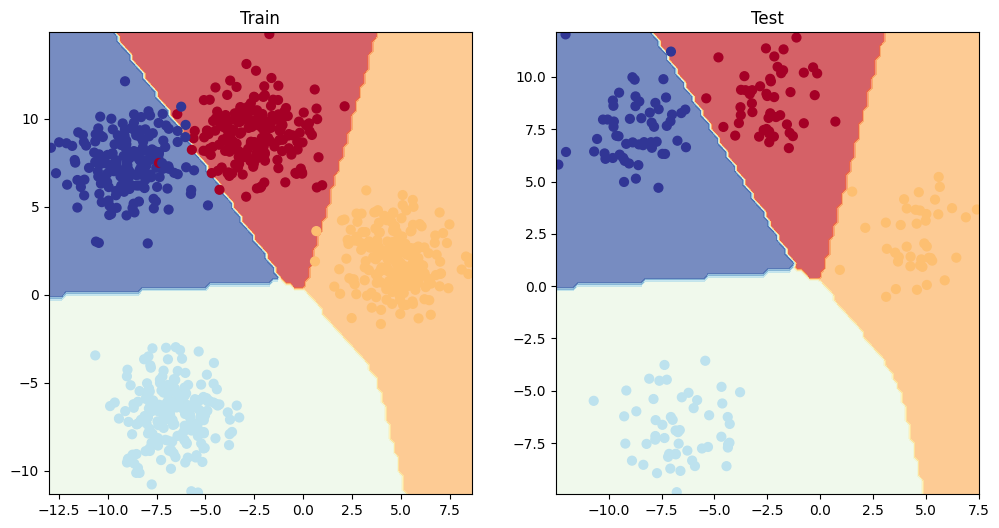

In [111]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification Report

See this aricle for clasification matrics - https://towardsdatascience.com/evaluation-metrics-for-classification-beyond-accuracy-1e20d8c76ba0/

see this article to use Precision/recall -- https://medium.com/data-science/beyond-accuracy-precision-and-recall-3da06bea9f6c

In [112]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [116]:
from torchmetrics import Accuracy

# Set up metric
torchmetric_acc = Accuracy(task = 'multiclass', num_classes = len(torch.unique(y_blob_train))).to(device)

# Calculate Accuracy
torchmetric_acc(y_preds, y_blob_test)

tensor(0.9950)